<a href="https://colab.research.google.com/github/gr-uzun/medical-cost-analysis/blob/main/medical_cost_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**@author :** Gürkan UZUN

**@since :** 2023.08.22

**@see :**
- https://www.kaggle.com/datasets/mirichoi0218/insurance
- https://www.kaggle.com/code/hely333/eda-regression
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
- https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In this project, you will be trying to develop an end-to-end data science application using the dataset given above. The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. While creating the project, try to follow the instructions below and make sure that the project is unique.

Creating a Google Colaboratory File
Make sure your project has .ipynb extension.
Make sure that there are comment lines explaining the details in your project.
When submitting the project, submit the cells of this .ipynb file so that the cells are run and the results are visible.

1. **Creating a Google Colaboratory File**
    - Make sure your project has .ipynb extension.
    - Make sure that there are comment lines explaining the details in your project.
    - When submitting the project, submit the cells of this .ipynb file so that the cells are
run and the results are visible.

2. **Importing Required Libraries**
    - Import the required libraries for the project to the Colab environment.
    - Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis

In [53]:
# Importing Required Libraries
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder # One-hot encoding a single column

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Read insurance.csv file and import dataset**

In [3]:
# Import dataset
path ='./dataset/'
df_insurance = pd.read_csv(path+'insurance.csv')

print('\nNumber of rows and columns in the data set: ',df_insurance.shape)
print('')

df_insurance.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. **Perform An Exploratory Data Analysis**
    - Analyze the data and draw meaningful conclusions from the data.
      - Examine the distribution of Bmi (Body Mass Index)
      - Examine the relationship between “smoker” and “charges”
      - Examine the relationship between “smoker” and “region”.
      - Examine the relationship between “bmi” and “sex”.
      - Find the "region" with the most "children".
      - Examine the relationship between “age” and “bmi”.
      - Examine the relationship between “bmi” and “children”.
      - Is there an outlier in the "bmi" variable? Please review.
      - Examine the relationship between “bmi” and “charges”.
      - Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

    - Try to use data visualization techniques as much as possible while examining the data.
    - Please add the meanings you deduced from the analyzes as a comment line.

In [4]:
df = df_insurance.copy()

In [5]:
# Examine the distribution of Bmi (Body Mass Index)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [9]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-9-4bd61155b3f9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Violin plot of Charges vs Smoker')

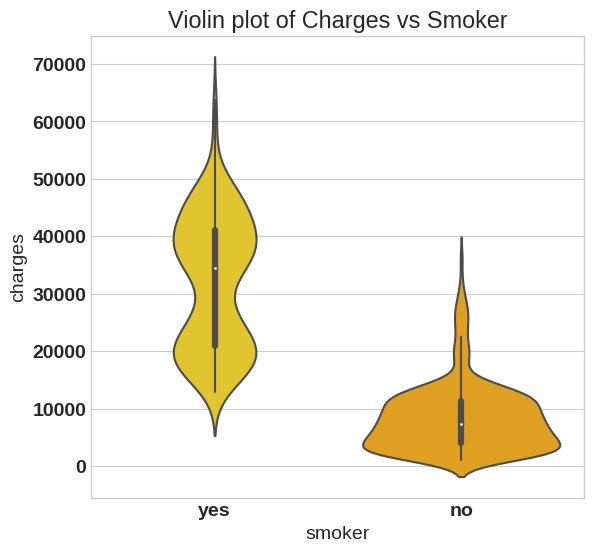

In [15]:
# Examine the relationship between “smoker” and “charges”

# Comments
# It shows the distribution of quantitative data(charges) across several levels of one (or more) categorical variables(smoker) such that those distributions can be compared.

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='smoker', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs Smoker')

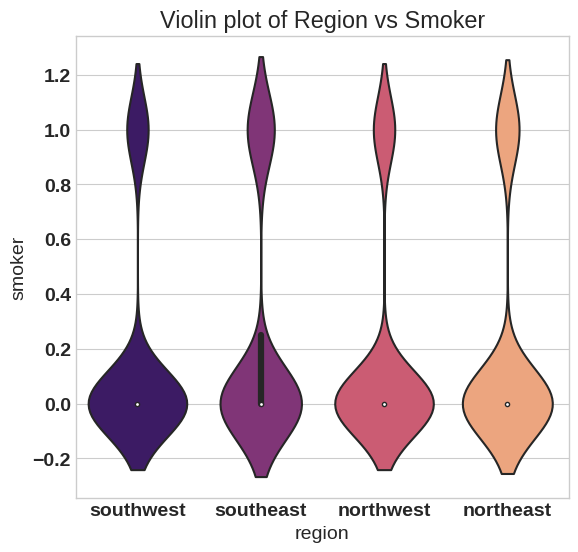

In [16]:
# Examine the relationship between “smoker” and “region”.

# Comments
# It shows the distribution of quantitative data(region) across several levels of one (or more) categorical variables(smoker) such that those distributions can be compared.
# It is hard to plot of relation between two string type categorical data.Smoker data must be converted to labeled or int type.

df2 = df.copy()
le = LabelEncoder()

# smoker or not
le.fit(df2.smoker.drop_duplicates())
df2.smoker = le.transform(df.smoker)

#df2['smoker'] = df2['smoker'].map({'yes': 1, 'no': 0})

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='region', y='smoker',data=df2,palette='magma',ax=ax)
ax.set_title('Violin plot of Region vs Smoker');


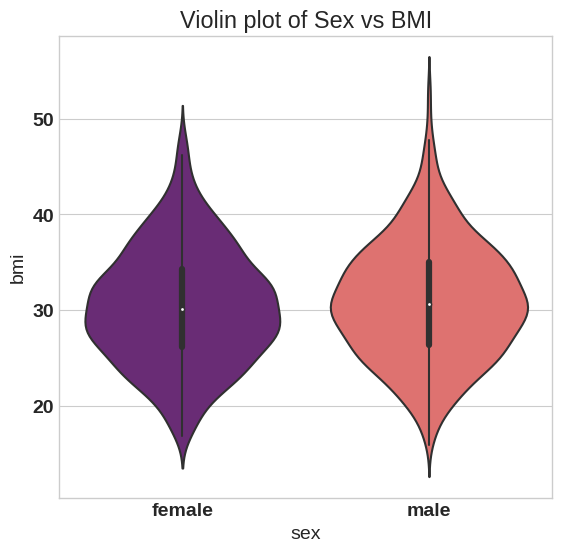

In [17]:
# Examine the relationship between “bmi” and “sex”

# Comments
# It shows the distribution of quantitative data(BMI) across several levels of one (or more) categorical variables(sex) such that those distributions can be compared.

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='bmi',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Sex vs BMI');

In [14]:
# Find the "region" with the most "children".

# Comments
# region has southeast has max. count

df.groupby('region').agg(['mean','min','max','count'])['children']

<ipython-input-14-0878b55dc47a>:6: FutureWarning: ['sex', 'smoker'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('region').agg(['mean','min','max','count'])['children']


,mean,min,max,count
region,,,,
northeast,1.046296,0,5,324
northwest,1.147692,0,5,325
southeast,1.049451,0,5,364
southwest,1.141538,0,5,325


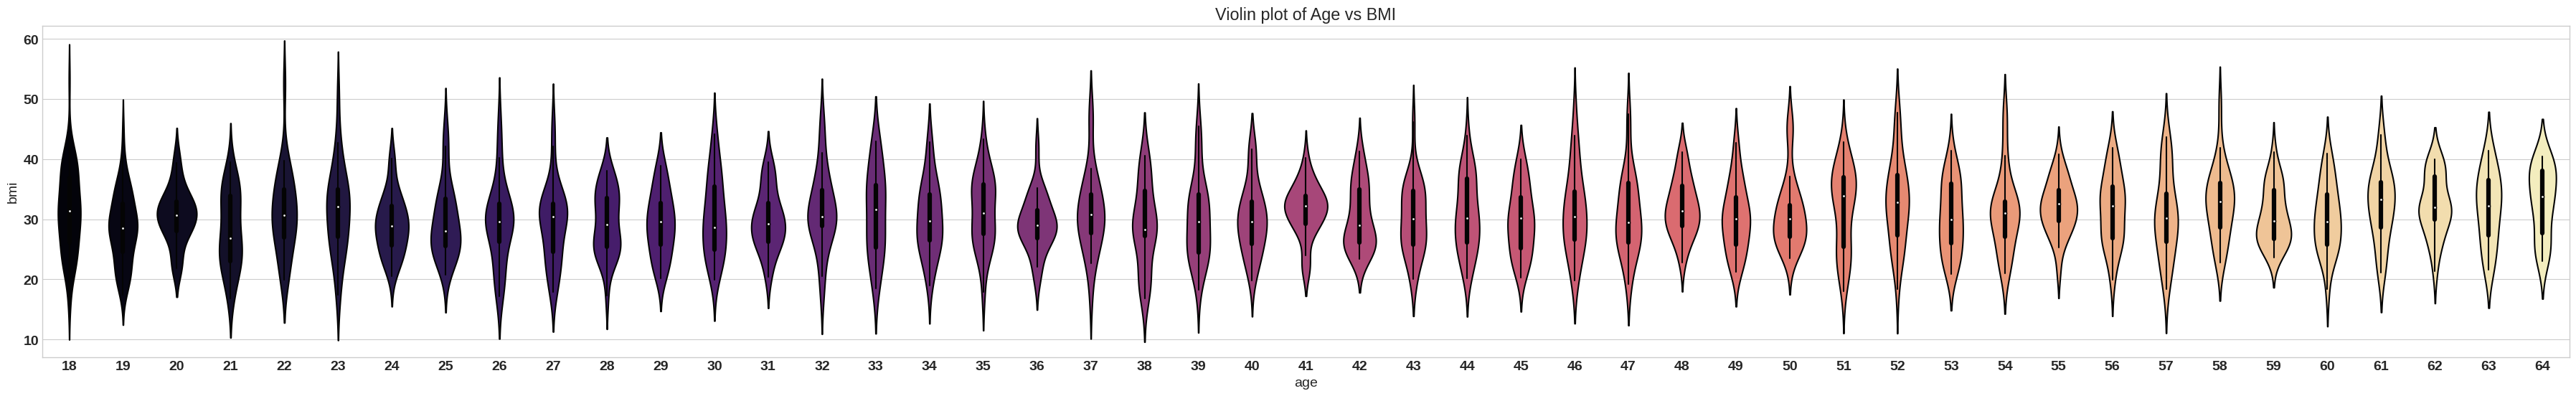

In [18]:
# Examine the relationship between “age” and “bmi”.

# Comments
# It shows the distribution of quantitative data(BMI) across several levels of one (or more) categorical variables(age) such that those distributions can be compared.

f = plt.figure(figsize=(100,6))
ax = f.add_subplot(121)
sns.violinplot(x='age', y='bmi',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Age vs BMI');


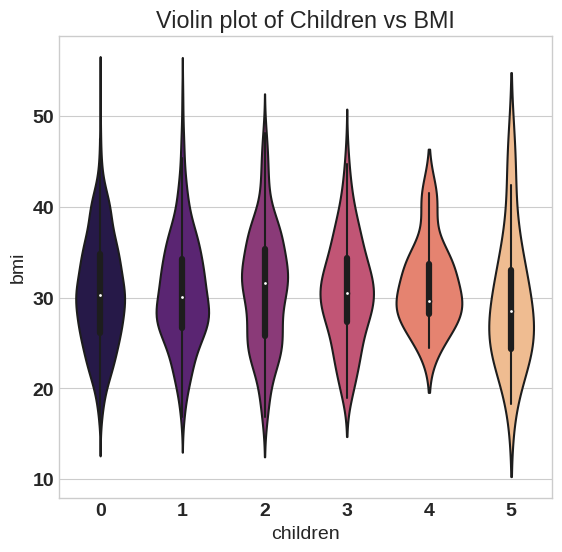

In [19]:
# Examine the relationship between “bmi” and “children”.

# Comments
# It shows the distribution of quantitative data(BMI) across several levels of one (or more) categorical variables(children) such that those distributions can be compared.

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='children', y='bmi',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Children vs BMI');

<Axes: xlabel='bmi'>

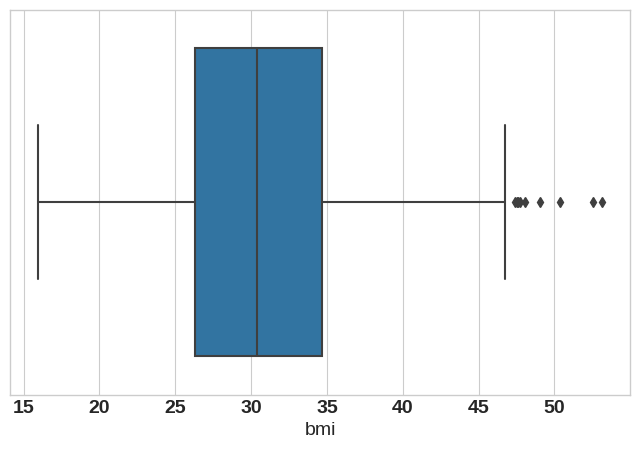

In [20]:
# Is there an outlier in the "bmi" variable? Please review.

# Comments
# Most of BMI values are between 25 and 35 , some BMI outliers values (approximitly 10 units) are over 45.

sns.boxplot(x='bmi',data=df)

<ipython-input-21-89eac7102288>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='bmi', y='charges',data=df,palette='magma',ax=ax)


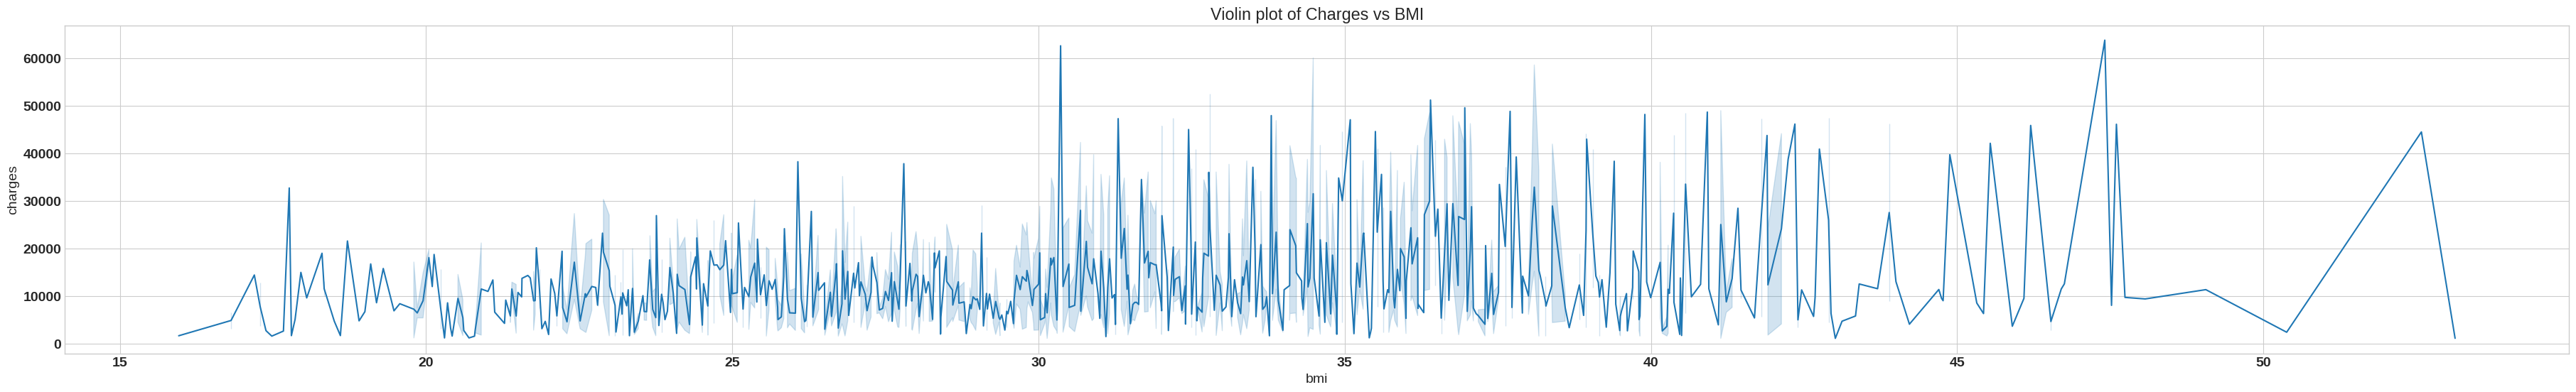

In [21]:
# Examine the relationship between “bmi” and “charges”.

# Comments
# The line plot graph shows the relationship between “bmi” and “charges” clearly

f = plt.figure(figsize=(100,6))
ax = f.add_subplot(121)
sns.lineplot(x='bmi', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs BMI');

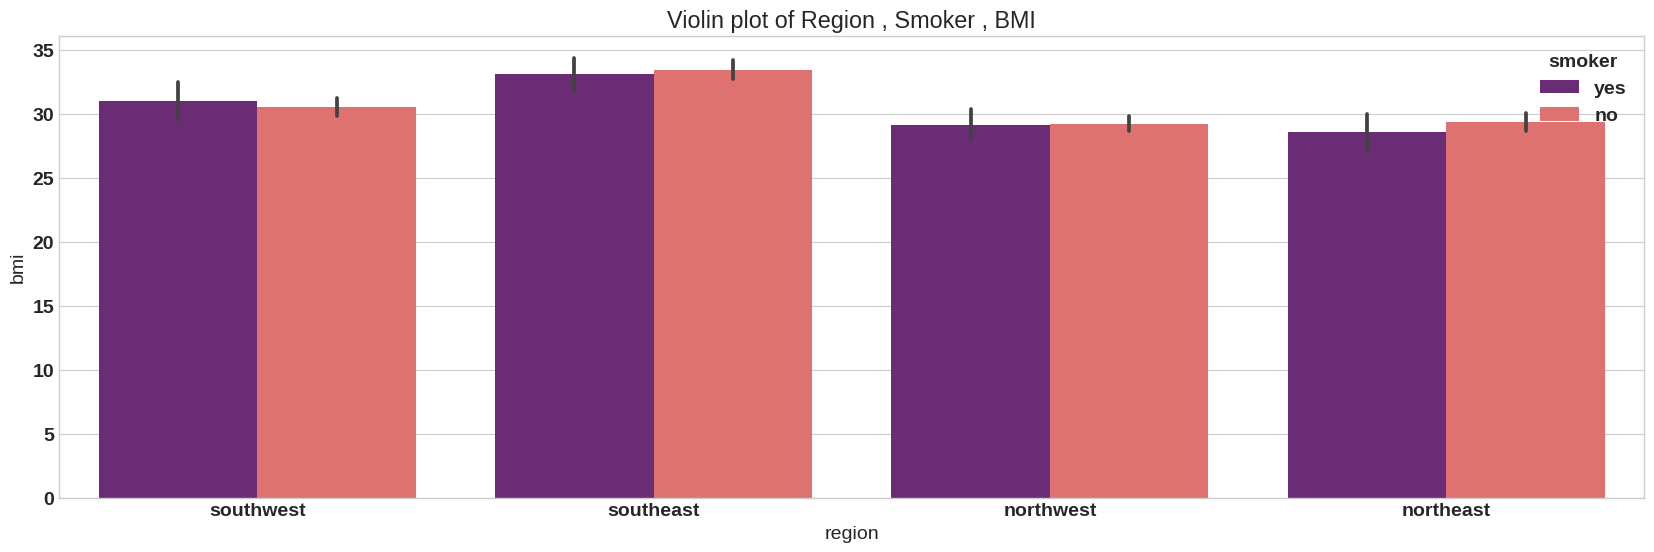

In [22]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

# Comments
# The bar plot graph shows the relationship between “region”, “smoker” and “bmi” clearly

f = plt.figure(figsize=(45,6))
ax = f.add_subplot(121)
sns.barplot(x='region', y='bmi',hue='smoker', data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Region , Smoker , BMI');

4. **Data Preprocessing**
    - In this section, prepare the data you have, for training the model.
    - Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.
    - Split your dataset into X_train,X_test, y_train, y_test.
    - Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

In [23]:
# Label Encoding

# Comments
# For a start, we will encode categorical features.
# Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

df_le = df_insurance.copy()

le = LabelEncoder()

# sex
le.fit(df_le.sex.drop_duplicates())
df_le.sex = le.transform(df_le.sex)

# smoker or not
le.fit(df_le.smoker.drop_duplicates())
df_le.smoker = le.transform(df_le.smoker)

# region
le.fit(df_le.region.drop_duplicates())
df_le.region = le.transform(df_le.region)

print('\nNumber of rows and columns in the data set: ',df_le.shape)
print('')

df_le.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [24]:
# One-hot encoding

# Comments
# One-hot encoding a single column
# df_ohe looks same as original df_insurance

df_ohe = df_insurance.copy()

ohe = OneHotEncoder()

# sex
transformed = ohe.fit_transform(df_ohe[['sex']])
print(transformed.toarray())

# smoker or not
transformed = ohe.fit_transform(df_ohe[['smoker']])
print(transformed.toarray())

# region
transformed = ohe.fit_transform(df_ohe[['region']])
print(transformed.toarray())

print('\nNumber of rows and columns in the data set: ',df_ohe.shape)
print('')

df_ohe.head()

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# Dummy variable trap encoding (OHE)

categorical_columns = ['sex','children', 'smoker', 'region']
df_dummy_variable_trap = pd.get_dummies(data = df_insurance, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
               dtype='int8')

print('\nNumber of rows and columns in the data set: ',df_dummy_variable_trap.shape)
print('')

df_dummy_variable_trap.head()


Number of rows and columns in the data set:  (1338, 13)



,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [38]:
# Split your dataset into X_train,X_test, y_train, y_test

#X = df_le.drop('charges',axis=1) # Independent variables
X = df_dummy_variable_trap.drop('charges',axis=1) # Independent variables

print('*** X : ',X)

#y = df_le['charges'] # dependent variable
y = df_dummy_variable_trap['charges'] # dependent variable

print('*** y : ',y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

*** X :        age     bmi  OHE_male  OHE_1  OHE_2  OHE_3  OHE_4  OHE_5  OHE_yes  \
0      19  27.900         0      0      0      0      0      0        1   
1      18  33.770         1      1      0      0      0      0        0   
2      28  33.000         1      0      0      1      0      0        0   
3      33  22.705         1      0      0      0      0      0        0   
4      32  28.880         1      0      0      0      0      0        0   
...   ...     ...       ...    ...    ...    ...    ...    ...      ...   
1333   50  30.970         1      0      0      1      0      0        0   
1334   18  31.920         0      0      0      0      0      0        0   
1335   18  36.850         0      0      0      0      0      0        0   
1336   21  25.800         0      0      0      0      0      0        0   
1337   61  29.070         0      0      0      0      0      0        1   

      OHE_northwest  OHE_southeast  OHE_southwest  
0                 0              0    

In [ ]:
# Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

5. **Model Selection**
    - Select several regression models and train them with the preprocessed data.
    - Examine the performances of the selected models using cross validation.
    - Choose the best performing model

Select several regression models and train them with the preprocessed data.

In [56]:
# Creating models
linear_regression_model = LinearRegression()
ridge_model = Ridge() #L2
lasso_model = Lasso() #L1

random_forest_model = RandomForestRegressor(n_estimators = 100,
                                            criterion = 'friedman_mse',
                                            random_state = 1,
                                            n_jobs = -1)

In [57]:
# Trainning models
linear_regression_model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', n_jobs=-1, random_state=1)

In [58]:
# Make prediction using the test dataset on Linear Regression model
linear_regression_y_pred = linear_regression_model.predict(X_test)

# Make prediction using the test dataset on Ridge model
ridge_y_pred = ridge_model.predict(X_test)

# Make prediction using the test dataset on Lasso model
lasso_y_pred = lasso_model.predict(X_test)

# Make prediction using the test dataset on Random Forest model
random_forest_y_pred = lasso_model.predict(X_test)

6. **Hyper-parameter Optimization**
    - Optimize the hyper-parameters of the model selected in the previous step.
    - Optimize parameters with Grid Search. (Grid Search or Randomized Search)

7. **Model Evaluation**
    - Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean
Squared Error, Mean Absolute Error etc.)

In [61]:
pred_dict = {"Linear Regression": linear_regression_y_pred, "Ridge":ridge_y_pred, "Lasso": lasso_y_pred , "Random Forest" : random_forest_y_pred}

for key, value in pred_dict.items():
  print("*** Model: ", key , ' ***')
  print("R2 Score:", r2_score(y_test, value))
  print('Mean Absolute Error:', mean_absolute_error(y_test, value))
  print('Mean Squared Error:', mean_squared_error(y_test, value))
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, value)))
  print()

*** Model:  Linear Regression  ***
R2 Score: 0.730528429980745
Mean Absolute Error: 4037.1569388512075
Mean Squared Error: 35152074.79986037
Root Mean Squared Error: 5928.918518571526

*** Model:  Ridge  ***
R2 Score: 0.7313103495011398
Mean Absolute Error: 4041.4045114596183
Mean Squared Error: 35050074.824625775
Root Mean Squared Error: 5920.310365565793

*** Model:  Lasso  ***
R2 Score: 0.7306765051509857
Mean Absolute Error: 4035.7453620156025
Mean Squared Error: 35132758.66398773
Root Mean Squared Error: 5927.289318397385

*** Model:  Random Forest  ***
R2 Score: 0.7306765051509857
Mean Absolute Error: 4035.7453620156025
Mean Squared Error: 35132758.66398773
Root Mean Squared Error: 5927.289318397385

